In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

In [ ]:
data = pd.read_csv('cleaned.csv')

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = data['text']
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent)

[['saturday', '’', 's', 'debate', 'got', 'a', 'little', 'intense', ',', 'but', 'laid', 'down', 'the', 'truth', '!', 'say', 'whatever', 'you', 'want', 'about', 'her', 'delivery', ',', 'the', 'fact', 'of', 'the', 'matter', 'is', ',', 'we', 'do', 'have', 'autonomy', 'over', 'our', '!', 'stop', 'the', 'walkaway'], ['are', 'on', 'the', 'ballot', 'midterms2022', '.', 'don', '’', 't', 'f', 'it', 'up', '.', 'the', 'world', 'is', 'watching'], ['saturday', '’', 's', 'debate', 'got', 'a', 'little', 'intense', ',', 'but', 'laid', 'down', 'the', 'truth', '!', 'say', 'whatever', 'you', 'want', 'about', 'her', 'delivery', ',', 'the', 'fact', 'of', 'the', 'matter', 'is', ',', 'we', 'do', 'have', 'autonomy', 'over', 'our', '!', 'stop', 'the', 'walkaway'], ['saturday', '’', 's', 'debate', 'got', 'a', 'little', 'intense', ',', 'but', 'laid', 'down', 'the', 'truth', '!', 'say', 'whatever', 'you', 'want', 'about', 'her', 'delivery', ',', 'the', 'fact', 'of', 'the', 'matter', 'is', ',', 'we', 'do', 'have', 

In [ ]:
# import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 10, window = 2, min_count = 1, epochs = 100)


In [ ]:
sentence_vecs = []
for tok_sen in tokenized_sent:
  sentence_vecs.append(model.infer_vector(tok_sen))

In [ ]:
len(sentence_vecs[0])

10

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=15).fit(sentence_vecs)

In [ ]:
labels = clustering.labels_


In [ ]:
np.unique(labels)

array([-1,  0,  1])

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 16.9 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(threshold, sentence):
    sid_obj = SentimentIntensityAnalyzer()
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    return sentiment_dict['compound']
    # # decide sentiment as positive, negative and neutral
    # if sentiment_dict['compound'] >= threshold :
    #     return 1
    # elif sentiment_dict['compound'] <= - threshold :
    #     return -1
    # else :
    #     return 0

In [ ]:
def get_frequent_words(sentences):
  print(len(sentences))
  tweets = sentences.str.split()
  tweets = tweets.values.tolist()
  corpus=[word.lower() for i in tweets for word in i if word !='/><br' and word != 'br']
  counter = Counter(corpus)
  most = counter.most_common()
  x, y= [], []

  # number of most frequent word will plot
  n_freq = 15

  for word,count in most[:200]:
      # filtering STOPWORDS and , ' . marks
      if (word not in STOPWORDS) and len(word) > 2:
          x.append(word)
          y.append(count)
      if len(x) == n_freq:
        break
  plt.figure(figsize = [5, 3])
  sns.barplot(x=y,y=x)
  plt.tight_layout()
  plt.xlabel('word frequency')

1092
None
2505
None
21
None


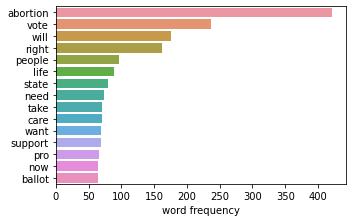

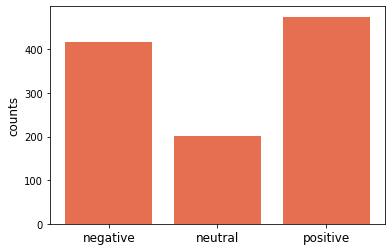

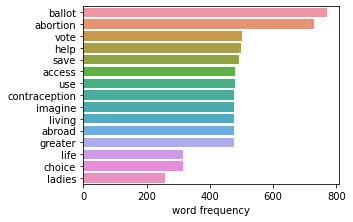

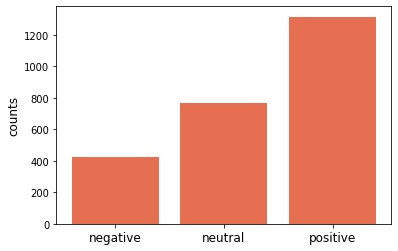

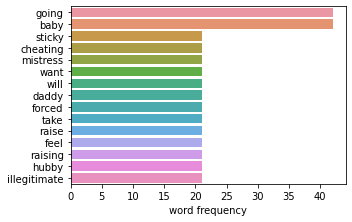

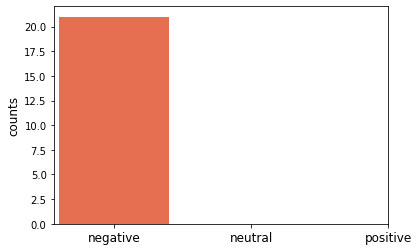

In [ ]:
for k in np.unique(labels):
  print(get_frequent_words(sentences[labels == k]))
  sentiment_class = []
  for tweet in sentences[labels == k]:
    sentiment_class.append(sentiment_scores(0.05, tweet))
  counter_sent = Counter(sentiment_class)
  plt.figure()
  plt.bar(counter_sent.keys(), counter_sent.values(), color = '#e76f51')
  plt.ylabel('counts', fontsize = 12)
  plt.xticks(np.linspace(-1, 1, 3), ['negative', 'neutral', 'positive'], fontsize = 12)
  

In [ ]:
corpus=[]
tweets = data['text'].str.split()
tweets = tweets.values.tolist()
corpus=[word.lower() for i in tweets for word in i if word !='/><br' and word != 'br']

Text(0.5, 6.0, 'word frequency')

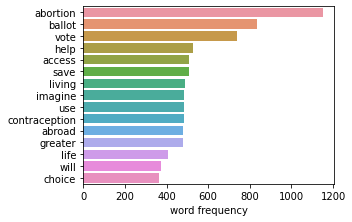

In [ ]:
counter = Counter(corpus)
most = counter.most_common()
x, y= [], []

# number of most frequent word will plot
n_freq = 15

for word,count in most[:200]:
    # filtering STOPWORDS and , ' . marks
    if (word not in STOPWORDS) and len(word) > 2:
        x.append(word)
        y.append(count)
    if len(x) == n_freq:
      break
plt.figure(figsize = [5, 3])
sns.barplot(x=y,y=x)
plt.tight_layout()
plt.xlabel('word frequency')

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.0 MB/s 
     |████████████████████████████████| 5.5 MB 46.1 MB/s 
     |████████████████████████████████| 1.3 MB 40.6 MB/s 
     |████████████████████████████████| 163 kB 54.0 MB/s 
     |████████████████████████████████| 7.6 MB 31.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=98c20b735fcbd5d5ace36c7a87878996994199458aeef7c5f0bd8b8c234d49e6
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
sentence_embeddings = sbert_model.encode(sentences)

In [ ]:
sentence_embeddings.shape

(3618, 768)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
X = sentence_embeddings
for i in range(2, 50, 1):
  clustering2 = KMeans(n_clusters=i, random_state=10)
  cluster_labels = clustering2.fit_predict(X)
  # print(cluster_labels)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(len(np.unique(cluster_labels)), silhouette_avg)

2 0.13971302
3 0.17009063
4 0.18671097
5 0.21245952
6 0.23385595
7 0.25188717
8 0.26459396
9 0.27344093
10 0.27882197
11 0.29059187
12 0.2956344
13 0.3101821
14 0.31498602
15 0.31853697
16 0.32226637
17 0.32725626
18 0.32738975
19 0.33282143
20 0.33182788
21 0.3377541
22 0.3416329
23 0.34318182
24 0.3466516
25 0.35129383
26 0.35158914
27 0.34696496
28 0.36243004
29 0.362564
30 0.3705496
31 0.3730638
32 0.37451097
33 0.3777348
34 0.37592322
35 0.3780863
36 0.38098684
37 0.38521424
38 0.3809214
39 0.38216943
40 0.39322782
41 0.39316878
42 0.39433226
43 0.39513922
44 0.40271866
45 0.3995603
46 0.40632957
47 0.4067735
48 0.4112837
49 0.40799177


In [ ]:
X = sentence_vecs
clustering2 = DBSCAN(eps=3, min_samples=15).fit(sentence_vecs)
b = clustering2.labels_

In [ ]:
np.unique(b)

array([-1,  0,  1,  2])

47
47
3528
3528
21
21
22
22


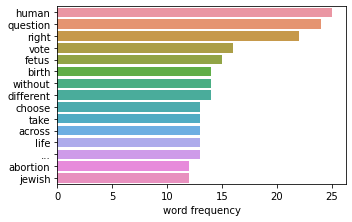

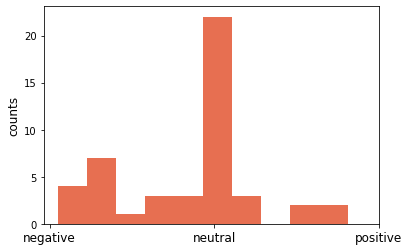

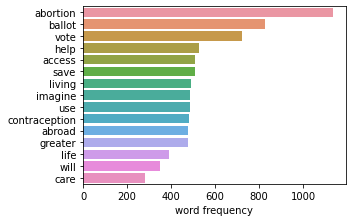

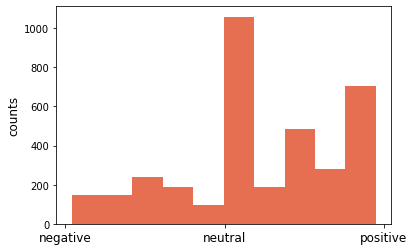

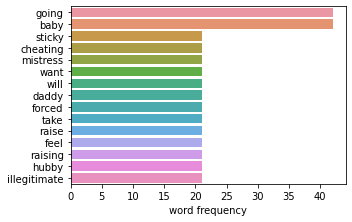

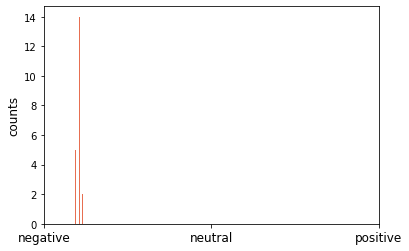

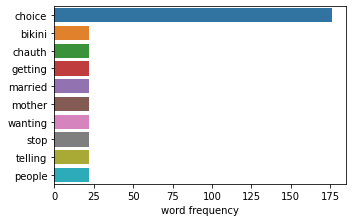

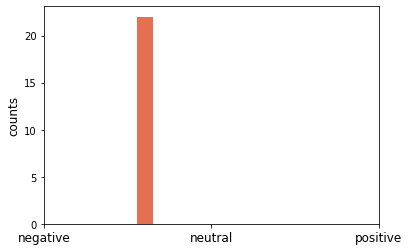

In [ ]:
for k in np.unique(b):
  get_frequent_words(sentences[b == k])
  sentiment_class = []
  for tweet in sentences[b == k]:
    sentiment_class.append(sentiment_scores(0.3, tweet))
  print(len(sentiment_class))
  # counter_sent = Counter(sentiment_class)
  plt.figure()
  plt.hist(sentiment_class, color = '#e76f51')
  plt.ylabel('counts', fontsize = 12)
  plt.xticks(np.linspace(-1, 1, 3), ['negative', 'neutral', 'positive'], fontsize = 12)

In [ ]:
count

363